<a href="https://colab.research.google.com/github/jahidurmahim/Machine_Learning_Laboratory/blob/main/Crick_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup and Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Initial Data Inspection

In [2]:
df=pd.read_excel('/content/drive/MyDrive/cricksheet_cricket_dataset_with_player_info.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             119 non-null    object 
 1   Country            119 non-null    object 
 2   Span               119 non-null    object 
 3   Mat                119 non-null    int64  
 4   Inns               119 non-null    int64  
 5   NO                 119 non-null    int64  
 6   Runs               106 non-null    float64
 7   HS                 107 non-null    float64
 8   Ave                107 non-null    float64
 9   BF                 107 non-null    float64
 10  SR                 107 non-null    float64
 11  100                107 non-null    float64
 12  50                 107 non-null    float64
 13  0                  119 non-null    int64  
 14  4s                 106 non-null    float64
 15  6s                 106 non-null    float64
 16  Boundary_Runs      119 non

In [4]:
df.shape

(119, 21)

In [5]:
df.head(5)

,Player,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,...,100,50,0,4s,6s,Boundary_Runs,Strike_Efficiency,Runs_per_Match,Conversion_Rate,Performance_Score
0,SR Tendulkar,INDIA,1989-2012,463,452,41,18426.0,200.0,44.83,21368.0,...,49.0,96.0,20,2016.0,NaN,9234,38.656909,39.796976,0.320796,42.033860
1,V Kohli,INDIA,2008-2021,254,245,39,12169.0,183.0,59.07,13061.0,...,43.0,62.0,13,1140.0,NaN,5310,55.035519,47.909449,0.428571,51.471104
2,RT Ponting,AUS/ICC,1995-2012,375,365,39,NaN,NaN,42.03,17046.0,...,30.0,NaN,20,1231.0,162.0,5896,33.787917,36.544000,0.306849,39.247793
3,RG Sharma,INDIA,2007-2021,227,220,32,9205.0,264.0,48.96,10354.0,...,29.0,43.0,13,832.0,244.0,4792,43.525440,40.550661,0.327273,44.301859
4,ST Jayasuriya,Asia/SL,1989-2011,445,433,18,13430.0,189.0,32.36,14725.0,...,28.0,68.0,34,1500.0,270.0,7620,29.512320,30.179775,0.221709,34.877045


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum() / len(df)

,0
Player,0.000000
Country,0.000000
Span,0.000000
Mat,0.000000
Inns,0.000000
NO,0.000000
Runs,0.109244
HS,0.100840
Ave,0.100840
BF,0.100840


### Missing Value Visualization

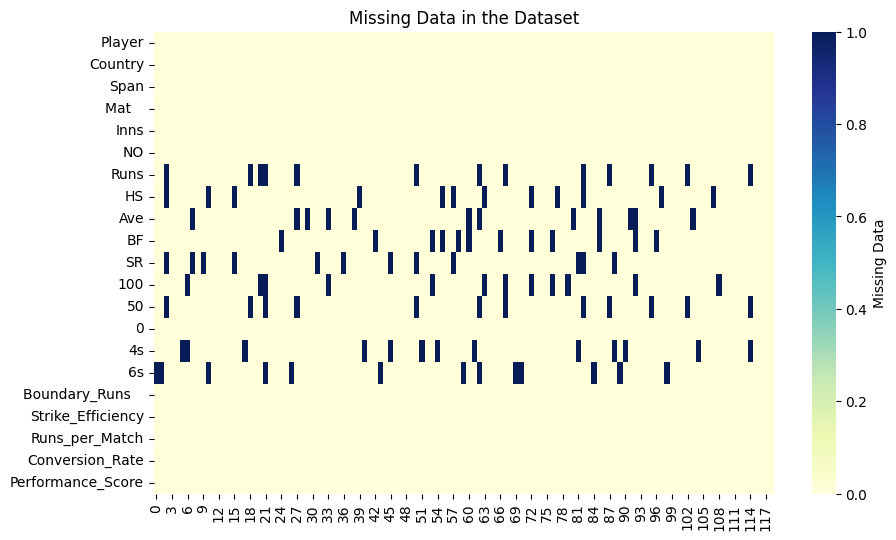

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data in the Dataset')
plt.show()

### Handling Missing Values

In [9]:
df.replace(["N/A", "missing", "unknown"], np.nan, inplace=True)
# Fill numeric columns with Median
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")
# Fill text columns (Country, Span) with Mode
for col in ['Country', 'Span']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

Filled missing values in 'Runs' with median: 5902.5
Filled missing values in 'HS' with median: 145.0
Filled missing values in 'Ave' with median: 37.98
Filled missing values in 'BF' with median: 7728.0
Filled missing values in 'SR' with median: 79.98
Filled missing values in '100' with median: 9.0
Filled missing values in '50' with median: 35.0
Filled missing values in '4s' with median: 547.0
Filled missing values in '6s' with median: 65.0


/tmp/ipython-input-579310415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [10]:
df.isna().sum()

,0
Player,0
Country,0
Span,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0


In [11]:
# Convert all applicable columns to numeric, ignoring errors
df = df.apply(pd.to_numeric, errors='ignore')

print('Data types after initial numeric conversion:')
df.info()

Data types after initial numeric conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             119 non-null    object 
 1   Country            119 non-null    object 
 2   Span               119 non-null    object 
 3   Mat                119 non-null    int64  
 4   Inns               119 non-null    int64  
 5   NO                 119 non-null    int64  
 6   Runs               119 non-null    float64
 7   HS                 119 non-null    float64
 8   Ave                119 non-null    float64
 9   BF                 119 non-null    float64
 10  SR                 119 non-null    float64
 11  100                119 non-null    float64
 12  50                 119 non-null    float64
 13  0                  119 non-null    int64  
 14  4s                 119 non-null    float64
 15  6s                 119 non-nu

/tmp/ipython-input-3054519357.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [12]:
# Check specific columns for 'object' dtype if they should be numeric
problematic_numeric_cols = []
for col in ['Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '4s', '6s']:
    if col in df.columns and df[col].dtype == 'object':
        problematic_numeric_cols.append(col)

if problematic_numeric_cols:
    print(f"The following columns still contain non-numeric data and are of 'object' type: {problematic_numeric_cols}")
    print("Attempting to coerce these columns to numeric, setting errors to NaN:")
    for col in problematic_numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # After coercion, fill any new NaNs with the median (or another appropriate strategy)
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  Coerced '{col}' to numeric and filled new NaNs with median: {median_val}")
    print('\nUpdated data types:')
    df.info()
else:
    print("All expected numeric columns are already in a numeric format.")

All expected numeric columns are already in a numeric format.


In [13]:
import pandas as pd
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please run the data loading and encoding cells first.")
else:
    print("Columns before simplification:")
    print(df.columns.tolist())
    def get_simplified_country_name(col_name):
        """
        Simplifies one-hot encoded country names.
        Examples:
        - 'Country_AUS' -> 'AUS'
        - 'Country_AUS/ICC' -> 'AUS'
        - 'Country_Afr/ICC/SA' -> 'SA'
        - 'Country_Asia/ICC/INDIA' -> 'INDIA'
        """
        if not col_name.startswith('Country_'):
            return None
        short_name = col_name.replace('Country_', '')
        parts = short_name.split('/')
        non_country_prefixes = ['Afr', 'Asia', 'ICC']

        if len(parts) == 1:
            return parts[0]
        else:
            return parts[0] if parts[0] not in non_country_prefixes else parts[-1]

    country_cols = [col for col in df.columns if col.startswith('Country_')]

    if not country_cols:
        print("No 'Country_' prefixed columns found. The DataFrame might already be simplified.")
    else:
        simplified_to_original_mapping = {}
        consolidated_cols_data = {}

        for col in country_cols:
            simplified_name = get_simplified_country_name(col)
            if simplified_name:
                if simplified_name not in consolidated_cols_data:
                    consolidated_cols_data[simplified_name] = df[col].copy()
                else:
                    consolidated_cols_data[simplified_name] = consolidated_cols_data[simplified_name] | df[col]

        df.drop(columns=country_cols, inplace=True)

        for new_col_name, series in consolidated_cols_data.items():
            df[new_col_name] = series
    print("\nDataFrame head after simplifying country columns:")
    display(df.head())
    print("\nDataFrame info after simplifying country columns:")
    df.info()

Columns before simplification:
['Player', 'Country', 'Span', 'Mat   ', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Boundary_Runs   ', 'Strike_Efficiency', 'Runs_per_Match', 'Conversion_Rate', 'Performance_Score']
No 'Country_' prefixed columns found. The DataFrame might already be simplified.

DataFrame head after simplifying country columns:


,Player,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,...,100,50,0,4s,6s,Boundary_Runs,Strike_Efficiency,Runs_per_Match,Conversion_Rate,Performance_Score
0,SR Tendulkar,INDIA,1989-2012,463,452,41,18426.0,200.0,44.83,21368.0,...,49.0,96.0,20,2016.0,65.0,9234,38.656909,39.796976,0.320796,42.033860
1,V Kohli,INDIA,2008-2021,254,245,39,12169.0,183.0,59.07,13061.0,...,43.0,62.0,13,1140.0,65.0,5310,55.035519,47.909449,0.428571,51.471104
2,RT Ponting,AUS/ICC,1995-2012,375,365,39,5902.5,145.0,42.03,17046.0,...,30.0,35.0,20,1231.0,162.0,5896,33.787917,36.544000,0.306849,39.247793
3,RG Sharma,INDIA,2007-2021,227,220,32,9205.0,264.0,48.96,10354.0,...,29.0,43.0,13,832.0,244.0,4792,43.525440,40.550661,0.327273,44.301859
4,ST Jayasuriya,Asia/SL,1989-2011,445,433,18,13430.0,189.0,32.36,14725.0,...,28.0,68.0,34,1500.0,270.0,7620,29.512320,30.179775,0.221709,34.877045



DataFrame info after simplifying country columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             119 non-null    object 
 1   Country            119 non-null    object 
 2   Span               119 non-null    object 
 3   Mat                119 non-null    int64  
 4   Inns               119 non-null    int64  
 5   NO                 119 non-null    int64  
 6   Runs               119 non-null    float64
 7   HS                 119 non-null    float64
 8   Ave                119 non-null    float64
 9   BF                 119 non-null    float64
 10  SR                 119 non-null    float64
 11  100                119 non-null    float64
 12  50                 119 non-null    float64
 13  0                  119 non-null    int64  
 14  4s                 119 non-null    float64
 15  6s                 119 

### Feature Encoding

Converting categorical columns like 'Country' into a numeric form using one-hot encoding with `pd.get_dummies`. The `drop_first=True` argument helps prevent multicollinearity by dropping the first category.

In [14]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)
print('DataFrame head after one-hot encoding:')
display(df.head())
print('\nDataFrame info after one-hot encoding:')
df.info()

DataFrame head after one-hot encoding:


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,Country_INDIA,Country_IRE,Country_NED,Country_NZ,Country_PAK,Country_SA,Country_SCOT,Country_SL,Country_WI,Country_ZIM
0,SR Tendulkar,1989-2012,463,452,41,18426.0,200.0,44.83,21368.0,86.23,...,True,False,False,False,False,False,False,False,False,False
1,V Kohli,2008-2021,254,245,39,12169.0,183.0,59.07,13061.0,93.17,...,True,False,False,False,False,False,False,False,False,False
2,RT Ponting,1995-2012,375,365,39,5902.5,145.0,42.03,17046.0,79.98,...,False,False,False,False,False,False,False,False,False,False
3,RG Sharma,2007-2021,227,220,32,9205.0,264.0,48.96,10354.0,88.90,...,True,False,False,False,False,False,False,False,False,False
4,ST Jayasuriya,1989-2011,445,433,18,13430.0,189.0,32.36,14725.0,91.20,...,False,False,False,False,False,False,False,False,False,False



DataFrame info after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  119 non-null    object 
 1   Span                    119 non-null    object 
 2   Mat                     119 non-null    int64  
 3   Inns                    119 non-null    int64  
 4   NO                      119 non-null    int64  
 5   Runs                    119 non-null    float64
 6   HS                      119 non-null    float64
 7   Ave                     119 non-null    float64
 8   BF                      119 non-null    float64
 9   SR                      119 non-null    float64
 10  100                     119 non-null    float64
 11  50                      119 non-null    float64
 12  0                       119 non-null    int64  
 13  4s                      119 non-null    float64
 14  6s

In [15]:
import pandas as pd

# First, let's confirm the current columns, especially the 'Country_' ones
print("Columns before simplification:")
print(df.columns.tolist())

# Function to simplify country names from one-hot encoded columns
def get_simplified_country_name(col_name):
    if not col_name.startswith('Country_'):
        return None

    short_name = col_name.replace('Country_', '')
    parts = short_name.split('/')

    non_country_prefixes = ['Afr', 'Asia', 'ICC']

    if len(parts) == 1:
        return parts[0]
    else:
        if parts[0] not in non_country_prefixes:
            return parts[0]
        else:
            return parts[-1]

# Identify current one-hot encoded country columns
country_cols_to_process = [col for col in df.columns if col.startswith('Country_')]

if not country_cols_to_process:
    print("No 'Country_' prefixed columns found to simplify. DataFrame might already be processed or not one-hot encoded.")
else:
    # Create a mapping for consolidation
    consolidated_cols_data = {}
    for col in country_cols_to_process:
        simplified_name = get_simplified_country_name(col)
        if simplified_name: # Should always be true for cols starting with 'Country_'
            if simplified_name not in consolidated_cols_data:
                consolidated_cols_data[simplified_name] = df[col].copy()
            else:
                # Use logical OR for consolidation if multiple map to the same name
                consolidated_cols_data[simplified_name] = consolidated_cols_data[simplified_name] | df[col]

    # Drop original country columns
    df = df.drop(columns=country_cols_to_process)

    # Add the new consolidated columns to the DataFrame
    for new_col_name, series in consolidated_cols_data.items():
        df[new_col_name] = series

    print('\nDataFrame head after simplifying country columns:')
    display(df.head())
    print('\nDataFrame info after simplifying country columns:')
    df.info()

Columns before simplification:
['Player', 'Span', 'Mat   ', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Boundary_Runs   ', 'Strike_Efficiency', 'Runs_per_Match', 'Conversion_Rate', 'Performance_Score', 'Country_AUS', 'Country_AUS/ICC', 'Country_Afr/ICC/SA', 'Country_Afr/SA', 'Country_Asia/ICC/INDIA', 'Country_Asia/ICC/PAK', 'Country_Asia/ICC/SL', 'Country_Asia/INDIA', 'Country_Asia/PAK', 'Country_Asia/SL', 'Country_BAN', 'Country_ENG', 'Country_ENG/ICC', 'Country_ENG/IRE', 'Country_ICC/NZ', 'Country_ICC/WI', 'Country_INDIA', 'Country_IRE', 'Country_NED', 'Country_NZ', 'Country_PAK', 'Country_SA', 'Country_SCOT', 'Country_SL', 'Country_WI', 'Country_ZIM']

DataFrame head after simplifying country columns:


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,PAK,SL,BAN,ENG,NZ,WI,IRE,NED,SCOT,ZIM
0,SR Tendulkar,1989-2012,463,452,41,18426.0,200.0,44.83,21368.0,86.23,...,False,False,False,False,False,False,False,False,False,False
1,V Kohli,2008-2021,254,245,39,12169.0,183.0,59.07,13061.0,93.17,...,False,False,False,False,False,False,False,False,False,False
2,RT Ponting,1995-2012,375,365,39,5902.5,145.0,42.03,17046.0,79.98,...,False,False,False,False,False,False,False,False,False,False
3,RG Sharma,2007-2021,227,220,32,9205.0,264.0,48.96,10354.0,88.90,...,False,False,False,False,False,False,False,False,False,False
4,ST Jayasuriya,1989-2011,445,433,18,13430.0,189.0,32.36,14725.0,91.20,...,False,True,False,False,False,False,False,False,False,False



DataFrame info after simplifying country columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             119 non-null    object 
 1   Span               119 non-null    object 
 2   Mat                119 non-null    int64  
 3   Inns               119 non-null    int64  
 4   NO                 119 non-null    int64  
 5   Runs               119 non-null    float64
 6   HS                 119 non-null    float64
 7   Ave                119 non-null    float64
 8   BF                 119 non-null    float64
 9   SR                 119 non-null    float64
 10  100                119 non-null    float64
 11  50                 119 non-null    float64
 12  0                  119 non-null    int64  
 13  4s                 119 non-null    float64
 14  6s                 119 non-null    float64
 15  Boundary_Runs      119 

### Feature Selection

I will now separate the DataFrame into independent variables (`X`) and the target variable (`y`).
- **Independent variables (X)**: All numeric player statistics, excluding 'Player', 'Span', and the target 'Performance_Score'.
- **Target variable (y)**: 'Performance_Score'.

In [16]:
# Define independent variables (X)
X = df.drop(columns=['Performance_Score', 'Player', 'Span'])

# Define target variable (y)
y = df['Performance_Score']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("\nFirst 5 rows of X:")
display(X.head())

print("\nFirst 5 rows of y:")
display(y.head())

Shape of X: (119, 30)
Shape of y: (119,)

First 5 rows of X:


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,PAK,SL,BAN,ENG,NZ,WI,IRE,NED,SCOT,ZIM
0,463,452,41,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,...,False,False,False,False,False,False,False,False,False,False
1,254,245,39,12169.0,183.0,59.07,13061.0,93.17,43.0,62.0,...,False,False,False,False,False,False,False,False,False,False
2,375,365,39,5902.5,145.0,42.03,17046.0,79.98,30.0,35.0,...,False,False,False,False,False,False,False,False,False,False
3,227,220,32,9205.0,264.0,48.96,10354.0,88.90,29.0,43.0,...,False,False,False,False,False,False,False,False,False,False
4,445,433,18,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,...,False,True,False,False,False,False,False,False,False,False



First 5 rows of y:


,Performance_Score
0,42.033860
1,51.471104
2,39.247793
3,44.301859
4,34.877045


### Train-Test Split

To evaluate the model's accuracy, the data will be split into training and testing sets.
- **`train_test_split`**: Splits arrays or matrices into random train and test subsets.
- **`test_size=0.2`**: Designates 20% of the data for the test set.
- **`random_state=42`**: Ensures that the split is reproducible, meaning you'll get the same training and test sets every time you run the code with this specific `random_state`.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
display(X_train.head())
print("\nFirst 5 rows of y_train:")
display(y_train.head())

Shape of X_train: (95, 30)
Shape of X_test: (24, 30)
Shape of y_train: (95,)
Shape of y_test: (24,)

First 5 rows of X_train:


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,PAK,SL,BAN,ENG,NZ,WI,IRE,NED,SCOT,ZIM
44,147,143,11,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,...,False,False,False,False,False,False,False,False,False,False
12,248,240,16,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,...,False,False,False,False,False,False,False,False,False,False
15,448,418,39,12650.0,145.0,33.37,16020.0,79.98,19.0,77.0,...,False,True,False,False,False,False,False,False,False,False
70,233,218,41,7381.0,119.0,41.70,11014.0,67.01,8.0,50.0,...,True,False,False,False,False,False,False,False,False,False
108,143,138,11,3675.0,122.0,28.93,5407.0,67.96,9.0,18.0,...,False,False,False,False,False,True,False,False,False,False



First 5 rows of y_train:


,Performance_Score
44,38.932884
12,35.885086
15,33.135972
70,35.727673
108,28.572527


### Feature Scaling

Ridge, Lasso, and ElasticNet models, which may be used later, are sensitive to the scale of the input features. Therefore, it's good practice to normalize the data. I will use `StandardScaler` to transform the features such that they have a mean of 0 and a standard deviation of 1.

- **`StandardScaler()`**: Initializes the scaler.
- **`scaler.fit_transform(X_train)`**: Fits the scaler on the training data and then transforms it. This ensures that the scaling parameters are learned only from the training data.
- **`scaler.transform(X_test)`**: Transforms the test data using the parameters learned from the training data. It's crucial not to `fit` the scaler on the test data to prevent data leakage.

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of scaled X_train:")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

print("\nFirst 5 rows of scaled X_test:")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

First 5 rows of scaled X_train:


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,PAK,SL,BAN,ENG,NZ,WI,IRE,NED,SCOT,ZIM
0,-0.485137,-0.446733,-0.647798,-0.302089,-0.044329,0.106394,-0.535848,0.459561,-0.006384,-0.084893,...,-0.466850,-0.235702,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
1,0.665639,0.730123,-0.315863,0.800845,0.855509,-0.452246,0.456507,0.279644,1.509934,0.085491,...,-0.466850,-0.235702,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
2,2.944403,2.889713,1.211040,2.560287,-0.224296,-0.886568,2.204019,-0.016902,1.206670,2.357271,...,-0.466850,4.242641,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
3,0.494732,0.463207,1.343814,0.525497,-1.160128,0.424268,0.815220,-1.189524,-0.461280,0.823819,...,2.142017,-0.235702,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
4,-0.530712,-0.507395,-0.647798,-0.905691,-1.052147,-1.585261,-0.740312,-1.103635,-0.309648,-0.993605,...,-0.466850,-0.235702,0.0,-0.398167,-0.235702,2.763397,-0.180579,0.0,-0.103142,-0.180579



First 5 rows of scaled X_test:


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,PAK,SL,BAN,ENG,NZ,WI,IRE,NED,SCOT,ZIM
0,1.827809,1.421677,4.198457,1.835424,1.143457,1.820081,1.172823,0.668409,-0.158016,2.130093,...,-0.46685,-0.235702,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
1,-0.940890,-0.944166,-1.046120,-1.138944,-0.584232,-1.157233,-1.317082,1.094241,-0.764544,-1.163988,...,-0.46685,4.242641,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
2,2.910222,3.071701,-0.183089,2.861508,1.359418,-1.045505,1.844751,0.997502,2.571357,1.846120,...,-0.46685,4.242641,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579
3,-0.029384,-0.155552,0.215234,0.270618,1.359418,1.258294,-0.173252,-0.016902,-0.006384,0.539847,...,-0.46685,-0.235702,0.0,-0.398167,-0.235702,2.763397,-0.180579,0.0,-0.103142,-0.180579
4,1.109998,1.203292,-0.647798,1.389771,0.747528,-0.490013,0.512270,1.516458,0.751775,1.107792,...,-0.46685,-0.235702,0.0,-0.398167,-0.235702,-0.361873,-0.180579,0.0,-0.103142,-0.180579


### Logistic Regression

As discussed, logistic regression is typically used for classification tasks. When applied to a continuous target variable like `Performance_Score`, it will either attempt to convert the continuous values into binary classes (which might not be the intended behavior) or raise an error, depending on the implementation and target variable range. For regression problems with continuous targets, linear regression or its regularized variants (Ridge, Lasso, ElasticNet, which we have already explored) are more appropriate.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# Initialize the Logistic Regression model
# Note: LogisticRegression is designed for classification tasks.
# Applying it directly to a continuous target like 'Performance_Score' will likely lead to unexpected behavior
# or errors, as it expects binary or multi-class labels.
# For demonstration, we will attempt to fit it, but be aware of its limitations for this problem type.

# To make it run without immediate error, we would typically need to discretize the continuous target variable.
# However, if the goal is to see 'an' output, we'll try to fit it as is, which might produce warnings or unexpected results.

# If we were to force it into a classification problem, we might define a threshold, e.g., high performance vs. low performance.
# For example, let's create a binary target for demonstration, e.g., 'Performance_Score' > median_score
median_performance_score = y_train.median()
y_train_binary = (y_train > median_performance_score).astype(int)
y_test_binary = (y_test > median_performance_score).astype(int)

# Initialize and fit Logistic Regression model with the *binary* target
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train_binary)

# Predict on the scaled test data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model (using accuracy for a classification context)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_binary, y_pred_logistic)
print(f"Logistic Regression Accuracy on Binary Target: {accuracy:.4f}")
print("\nClassification Report on Binary Target:")
print(classification_report(y_test_binary, y_pred_logistic))


Logistic Regression Accuracy on Binary Target: 0.9583

Classification Report on Binary Target:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.93      0.97        15

    accuracy                           0.96        24
   macro avg       0.95      0.97      0.96        24
weighted avg       0.96      0.96      0.96        24



### Polynomial Regression to Demonstrate Overfitting

To explicitly demonstrate overfitting, we can increase the complexity of the model by using a higher degree for polynomial features. A highly flexible model can fit the training data very well but may perform poorly on unseen test data.

- **`PolynomialFeatures(degree=5)`**: This will create polynomial features up to the 5th degree. This includes original features, their squares, cubes, up to the fifth power, and all cross-product terms.
- **`LinearRegression()`**: We will use a simple linear regression model on these highly transformed features. Without any regularization, this model is prone to overfitting if the polynomial degree is too high.
- **`model_poly.score(X_train_poly, y_train)`**: Calculates the R-squared score on the training data.
- **`model_poly.score(X_test_poly, y_test)`**: Calculates the R-squared score on the test data. A large difference between training and testing R-squared often indicates overfitting.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create polynomial features with a high degree to demonstrate complexity
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly_high_degree = poly.fit_transform(X_train_scaled)
X_test_poly_high_degree = poly.transform(X_test_scaled)

print(f"Original X_train_scaled shape: {X_train_scaled.shape}")
print(f"Polynomial X_train_poly_high_degree shape: {X_train_poly_high_degree.shape}")

# Initialize and fit a standard Linear Regression model on these high-degree polynomial features
model_poly_overfit = LinearRegression()
model_poly_overfit.fit(X_train_poly_high_degree, y_train)

# Evaluate the model on both training and test sets
train_score_poly_overfit = model_poly_overfit.score(X_train_poly_high_degree, y_train)
test_score_poly_overfit = model_poly_overfit.score(X_test_poly_high_degree, y_test)

print("\n📈 Overfitting using Polynomial Regression (degree=5) with LinearRegression:")
print(f"Training Accuracy (R²): {train_score_poly_overfit:.4f}")
print(f"Testing (R²):  {test_score_poly_overfit:.4f}")


Original X_train_scaled shape: (95, 30)
Polynomial X_train_poly_high_degree shape: (95, 324631)

📈 Overfitting using Polynomial Regression (degree=5) with LinearRegression:
Training Accuracy (R²): 1.0000
Testing (R²):  -42.9719


### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alphas = np.logspace(-4, 2, 100) # Define a range of alpha values
ridge_results = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)

    y_pred = ridge.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)

    # Number of non-zero coefficients (will stay constant)
    non_zero = np.sum(np.abs(ridge.coef_) > 1e-6)

    ridge_results.append({
        'Alpha': a,
        'Model': 'Ridge',
        'R2': r2,
        'Non_Zero_Coeffs': non_zero,
        'Avg_Coeff_Magnitude': np.mean(np.abs(ridge.coef_))
    })

ridge_df = pd.DataFrame(ridge_results)
display(ridge_df)

,Alpha,Model,R2,Non_Zero_Coeffs,Avg_Coeff_Magnitude
0,0.000100,Ridge,0.990175,28,0.302119
1,0.000115,Ridge,0.990175,28,0.302103
2,0.000132,Ridge,0.990175,28,0.302085
3,0.000152,Ridge,0.990176,28,0.302063
4,0.000175,Ridge,0.990176,28,0.302039
...,...,...,...,...,...
95,57.223677,Ridge,0.960594,28,0.220500
96,65.793322,Ridge,0.954315,28,0.218351
97,75.646333,Ridge,0.946907,28,0.215694
98,86.974900,Ridge,0.938190,28,0.212489


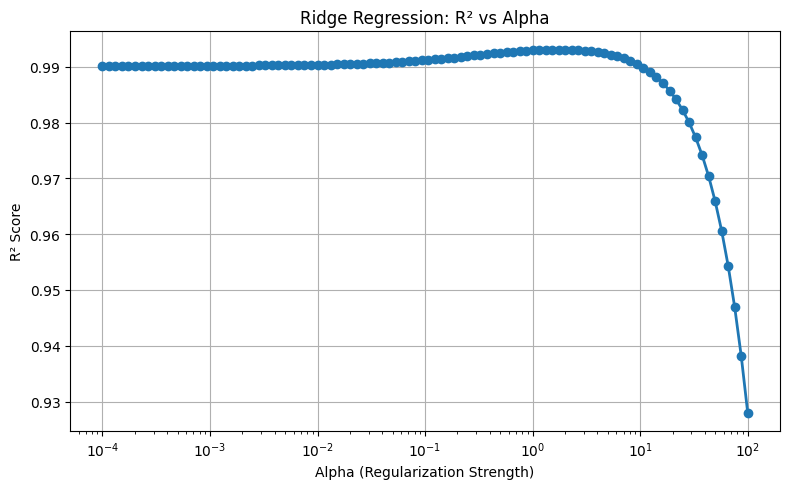

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    ridge_df['Alpha'],
    ridge_df['R2'],
    marker='o',
    linewidth=2
)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: R² vs Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

lasso_results = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    y_pred = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)

    # Count non-zero coefficients (Lasso feature selection)
    non_zero = np.sum(np.abs(lasso.coef_) > 1e-6)

    lasso_results.append({
        'Alpha': a,
        'Model': 'Lasso',
        'R2': r2,
        'Non_Zero_Coeffs': non_zero
    })

lasso_df = pd.DataFrame(lasso_results)
display(lasso_df)

,Alpha,Model,R2,Non_Zero_Coeffs
0,0.000100,Lasso,0.990298,28
1,0.000115,Lasso,0.990316,28
2,0.000132,Lasso,0.990335,28
3,0.000152,Lasso,0.990358,28
4,0.000175,Lasso,0.990383,28
...,...,...,...,...
95,57.223677,Lasso,-0.081476,0
96,65.793322,Lasso,-0.081476,0
97,75.646333,Lasso,-0.081476,0
98,86.974900,Lasso,-0.081476,0


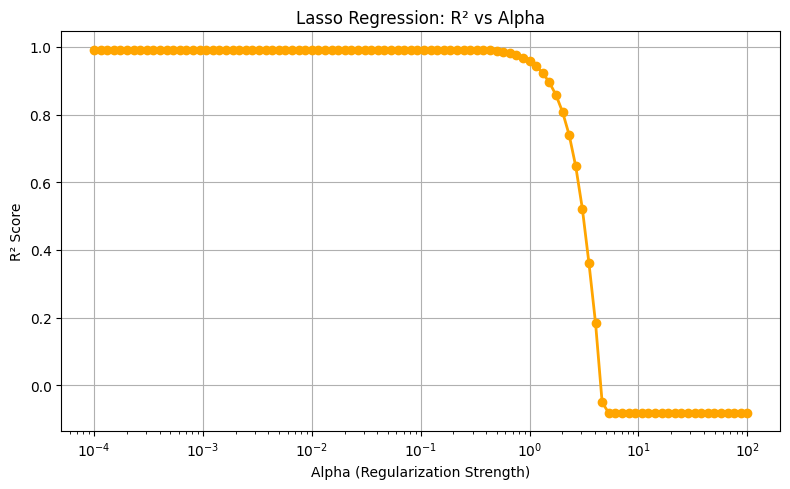

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    lasso_df['Alpha'],
    lasso_df['R2'],
    marker='o',
    linewidth=2,
    color='orange'
)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Lasso Regression: R² vs Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

### ElasticNet Regression

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

elasticnet_results = []

for a in alphas:
    elastic = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000)
    elastic.fit(X_train_scaled, y_train)

    y_pred = elastic.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)

    # Count non-zero coefficients (Elastic Net does feature selection)
    non_zero = np.sum(np.abs(elastic.coef_) > 1e-6)

    elasticnet_results.append({
        'Alpha': a,
        'Model': 'ElasticNet',
        'R2': r2,
        'Non_Zero_Coeffs': non_zero
    })

elasticnet_df = pd.DataFrame(elasticnet_results)
display(elasticnet_df)


,Alpha,Model,R2,Non_Zero_Coeffs
0,0.000100,ElasticNet,0.990309,28
1,0.000115,ElasticNet,0.990328,28
2,0.000132,ElasticNet,0.990349,28
3,0.000152,ElasticNet,0.990373,28
4,0.000175,ElasticNet,0.990399,28
...,...,...,...,...
95,57.223677,ElasticNet,-0.081476,0
96,65.793322,ElasticNet,-0.081476,0
97,75.646333,ElasticNet,-0.081476,0
98,86.974900,ElasticNet,-0.081476,0


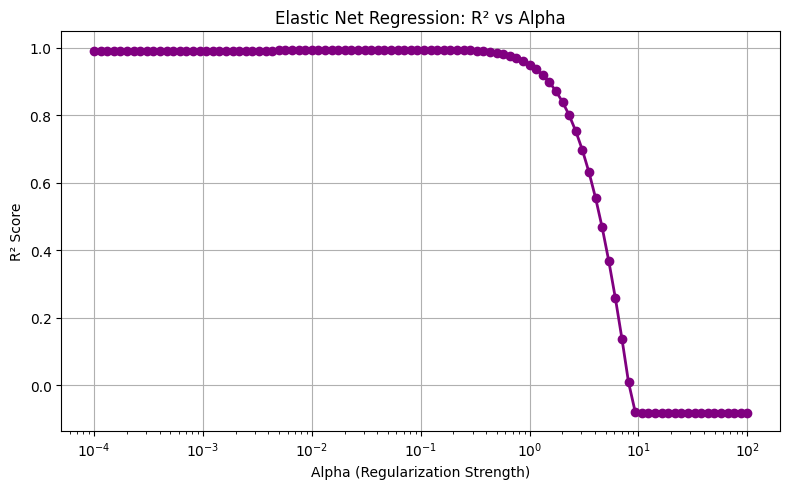

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    elasticnet_df['Alpha'],
    elasticnet_df['R2'],
    marker='o',
    linewidth=2,
    color='purple'
)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Elastic Net Regression: R² vs Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

### Combined Results

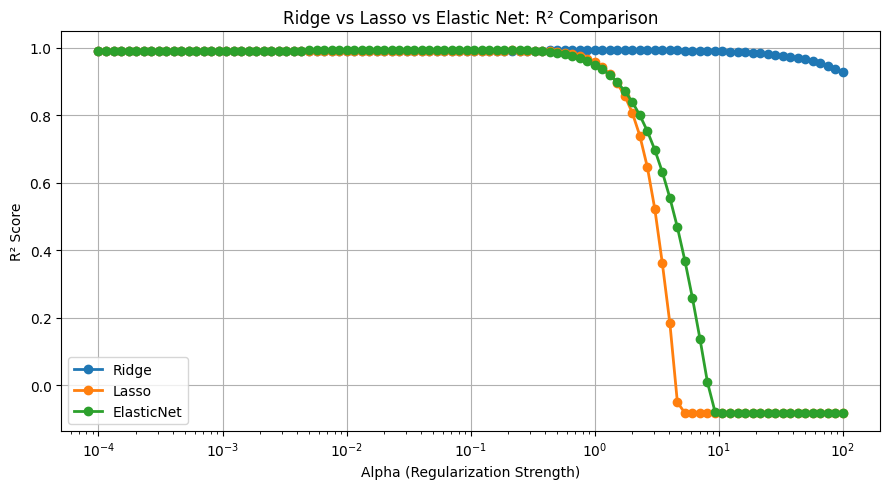

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

for model in results_combined_df['Model'].unique():
    subset = results_combined_df[results_combined_df['Model'] == model]

    plt.plot(
        subset['Alpha'],
        subset['R2'],
        marker='o',
        linewidth=2,
        label=model
    )

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge vs Lasso vs Elastic Net: R² Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Combine all results into a single DataFrame
results_combined_df = pd.concat([ridge_df, lasso_df, elasticnet_df], ignore_index=True)
print("Combined Regression Results:")
display(results_combined_df)

Combined Regression Results:


,Alpha,Model,R2,Non_Zero_Coeffs,Avg_Coeff_Magnitude
0,0.000100,Ridge,0.990175,28,0.302119
1,0.000115,Ridge,0.990175,28,0.302103
2,0.000132,Ridge,0.990175,28,0.302085
3,0.000152,Ridge,0.990176,28,0.302063
4,0.000175,Ridge,0.990176,28,0.302039
...,...,...,...,...,...
295,57.223677,ElasticNet,-0.081476,0,NaN
296,65.793322,ElasticNet,-0.081476,0,NaN
297,75.646333,ElasticNet,-0.081476,0,NaN
298,86.974900,ElasticNet,-0.081476,0,NaN
